In [31]:
print(ord("N")%3 + 1)

1


In [32]:
import numpy as np
import csv
import matplotlib.pyplot as plt

# 1. Функція для читання файлу та повернення стовпця як numpy масиву
def read_column_as_numpy(filename, column_name):
    """
    Зчитує вказаний стовпець з CSV-файлу і повертає його як масив numpy.
    """
    with open(filename, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        column_data = [int(row[column_name]) for row in reader]
    return np.array(column_data)

In [33]:
filename = ("russia_losses_equipment.csv")
column_name = 'aircraft'
aircraft_losses = read_column_as_numpy(filename, column_name)
print("1. Масив втрат літаків завантажено:", aircraft_losses)

1. Масив втрат літаків завантажено: [369 369 369 369 369 369 369 369 369 369 369 368 368 368 368 368 368 368
 368 368 368 368 368 368 368 368 367 367 367 367 367 367 367 367 367 367
 367 367 367 366 366 366 366 366 366 366 365 365 365 363 363 363 363 363
 363 363 363 363 363 363 363 362 362 362 362 361 361 361 361 361 361 361
 361 361 361 361 361 360 360 360 360 360 360 360 360 360 360 359 359 359
 359 359 359 359 359 359 359 359 359 359 359 359 359 359 358 357 357 357
 357 357 357 357 357 357 357 357 357 357 357 357 356 356 355 354 354 354
 354 354 353 351 351 351 350 350 349 349 349 349 349 349 349 348 348 348
 348 348 348 348 348 348 348 348 348 348 348 348 347 347 347 347 347 347
 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347
 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347
 347 347 347 347 347 347 346 345 342 342 340 340 340 340 339 339 338 338
 336 335 332 332 332 332 332 332 332 332 332 332 332 332 332 332 332 332
 332 332 332 33

In [34]:
daily_aircraft_losses = np.diff(aircraft_losses, prepend=0)
print("2. Добові втрати літаків:", daily_aircraft_losses)

2. Добові втрати літаків: [369   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0   0   0   0
   0   0   0  -1   0   0   0   0   0   0  -1   0   0  -2   0   0   0   0
   0   0   0   0   0   0   0  -1   0   0   0  -1   0   0   0   0   0   0
   0   0   0   0   0  -1   0   0   0   0   0   0   0   0   0  -1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1  -1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  -1   0  -1  -1   0   0
   0   0  -1  -2   0   0  -1   0  -1   0   0   0   0   0   0  -1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  -1  -1  -3   0  -2   0   0   0  -1   0  -1   0
  -2  -1  -3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  -1   0   0 

In [35]:
top_3_daily_losses = np.sort(daily_aircraft_losses)[-3:][::-1]
print("3. Три найбільші добові втрати літаків:", top_3_daily_losses)

3. Три найбільші добові втрати літаків: [369   1   0]


In [36]:
dates = []
with open(filename, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dates.append(row['date'])
dates = np.array(dates, dtype='datetime64[D]')
summer_mask = (dates >= np.datetime64('2022-06-01')) & (dates <= np.datetime64('2022-08-31'))
summer_aircraft_losses = daily_aircraft_losses[summer_mask].sum()
print("4. Втрати літаків влітку 2022 року:", summer_aircraft_losses)

4. Втрати літаків влітку 2022 року: -26


In [37]:
average_losses_last_300_days = np.mean(daily_aircraft_losses[-300:])
print("5. Середні втрати літаків за останні 300 днів:", average_losses_last_300_days)

5. Середні втрати літаків за останні 300 днів: -0.91


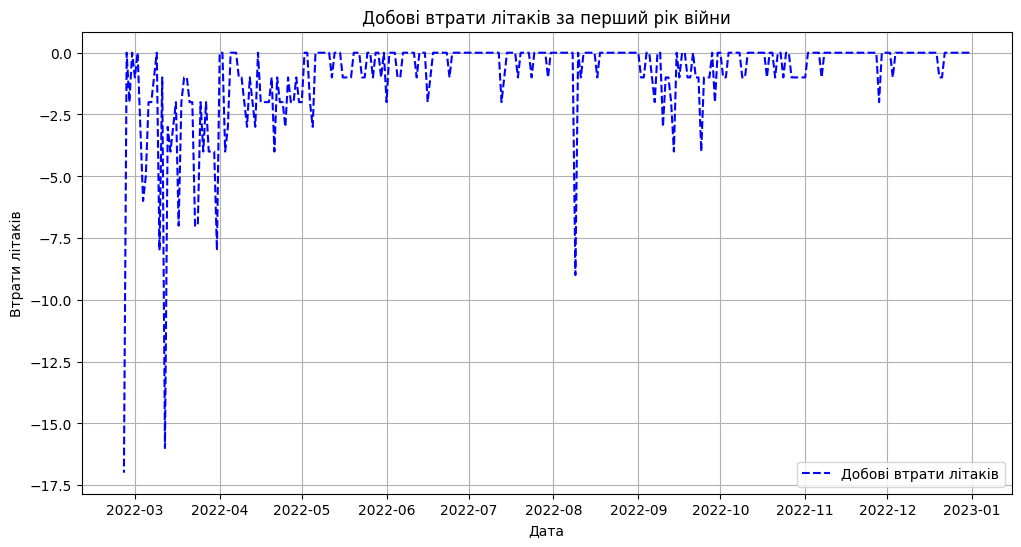

6. Графік добових втрат літаків за перший рік війни збережено у файл 'aircraft_losses_2022.png'


In [38]:
first_year_mask = (dates >= np.datetime64('2022-01-01')) & (dates <= np.datetime64('2022-12-31'))
first_year_dates = dates[first_year_mask]
first_year_losses = daily_aircraft_losses[first_year_mask]

plt.figure(figsize=(12, 6))
plt.plot(first_year_dates, first_year_losses, linestyle='--', color='b', label='Добові втрати літаків')
plt.xlabel('Дата')
plt.ylabel('Втрати літаків')
plt.title('Добові втрати літаків за перший рік війни')
plt.legend()
plt.grid(True)
plt.savefig('aircraft_losses_2022.png', dpi=100)  # Зберігаємо графік у файл
plt.show()
print("6. Графік добових втрат літаків за перший рік війни збережено у файл 'aircraft_losses_2022.png'")